In [1]:
# Exercise 4: Classification

In [33]:
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import (f1_score, accuracy_score, precision_score, 
                           recall_score, roc_auc_score, confusion_matrix, 
                           roc_curve)
import matplotlib.pyplot as plt

In [34]:
# Predict on the train set and test set
X , y = load_breast_cancer(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.20, random_state=43)

# scale data and fit model
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

classifier = LogisticRegression()
classifier.fit(X_train_scaled, y_train)

# Predictions
y_pred_train = classifier.predict(X_train_scaled)
y_pred_test = classifier.predict(X_test_scaled)

# Probability predictions for AUC
y_proba_train = classifier.predict_proba(X_train_scaled)[:, 1]
y_proba_test = classifier.predict_proba(X_test_scaled)[:, 1]

print("Train values predicted:\n", y_pred_train[:10])
print("Test values predicted:\n", y_pred_test[:10])

Train values predicted:
 [1 0 1 1 1 0 0 1 1 0]
Test values predicted:
 [1 1 0 0 0 1 1 1 0 0]


In [36]:
# Calculate metrics
def calculate_metrics(y_true, y_pred, y_proba, set_name):
    metrics = {
        'F1': f1_score(y_true, y_pred),
        'Accuracy': accuracy_score(y_true, y_pred),
        'Precision': precision_score(y_true, y_pred),
        'Recall': recall_score(y_true, y_pred),
        'AUC': roc_auc_score(y_true, y_proba)
    }
    print(f"\n{set_name} Set Metrics:")
    for metric, value in metrics.items():
        print(f"{metric}: {value}")
    return metrics

train_metrics = calculate_metrics(y_train, y_pred_train, y_proba_train, "Train")
test_metrics = calculate_metrics(y_test, y_pred_test, y_proba_test, "Test")


Train Set Metrics:
F1: 0.9911504424778761
Accuracy: 0.989010989010989
Precision: 0.9893992932862191
Recall: 0.9929078014184397
AUC: 0.998995613495675

Test Set Metrics:
F1: 0.9801324503311258
Accuracy: 0.9736842105263158
Precision: 0.9736842105263158
Recall: 0.9866666666666667
AUC: 0.9863247863247864


In [16]:
# Confusion matrix for test set
cm = confusion_matrix(y_test, y_pred_test)
print(f"\nConfusion Matrix (Test Set):")
print(cm)


Confusion Matrix (Test Set):
[[37  2]
 [ 1 74]]


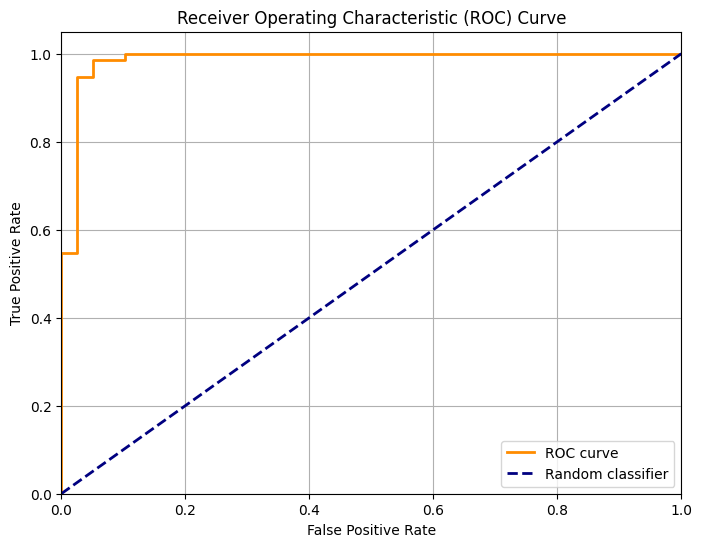

In [31]:
# Plot ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_proba_test)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Random classifier')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()